<a href="https://colab.research.google.com/github/Kcurr01/HUT_Research/blob/main/VAE_10_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import torch   
import torch.nn as nn                          
import torch.nn.functional as F                
import torch.optim as optim   
from torch.utils.data import TensorDataset, Dataset, DataLoader
from torch.autograd import Variable
import torch.utils.data

import pandas as pd 
import numpy as np                             
                                
import matplotlib.pyplot as plt
import seaborn as sns    
import plotly.offline as py
import plotly.graph_objs as go        
                
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [46]:
df = pd.read_csv("/content/drive/MyDrive/WEAR LAB/Research Pytorch/S1_E1_A1_v3.csv")

In [47]:
df.head()

,series_id,stimulus,Acc 1,Acc 2,Acc 3,EMG Channel 1,EMG Channel 2,EMG Channe 3,EMG Channel 4,EMG Channel 5,...,Cyber Glove (angles of the joints) Sensor 13,Cyber Glove (angles of the joints) Sensor 14,Cyber Glove (angles of the joints) Sensor 15,Cyber Glove (angles of the joints) Sensor 16,Cyber Glove (angles of the joints) Sensor 17,Cyber Glove (angles of the joints) Sensor 18,Cyber Glove (angles of the joints) Sensor 19,Cyber Glove (angles of the joints) Sensor 20,Cyber Glove (angles of the joints) Sensor 21,Cyber Glove (angles of the joints) Sensor 22
0,0,0,0.30176,0.78809,-0.66699,-22,-2,-16,-7,-3,...,20.974,-25.345,-3.9720,27.264,21.548,-0.084706,13.292,65.755,2.4706,24.565
1,0,0,0.30176,0.78809,-0.66699,5,-4,-12,-3,8,...,20.924,-25.345,-3.9011,27.264,21.478,-0.084706,13.292,65.755,2.4706,24.565
2,0,0,0.30176,0.78809,-0.66699,-6,1,4,-1,-9,...,20.875,-25.345,-3.8301,27.264,21.407,-0.084706,13.292,65.755,2.4706,24.565
3,0,0,0.30176,0.78809,-0.66699,15,10,19,9,10,...,20.826,-25.345,-3.7592,27.264,21.337,-0.084706,13.292,65.755,2.4706,24.565
4,0,0,0.24609,0.73535,-0.66309,-1,-16,-17,0,-2,...,20.776,-25.345,-3.6883,27.264,21.267,-0.084706,13.292,65.755,2.4706,24.565


In [48]:
X = df.iloc[:,2:]
y = df.iloc[:, 1:2]
print(X.shape, type(X), y.shape, type(y))
print()
print(y.value_counts())

(130200, 41) <class 'pandas.core.frame.DataFrame'> (130200, 1) <class 'pandas.core.frame.DataFrame'>

stimulus
0           49599
8            6795
5            6782
6            6776
7            6776
11           6773
1            6753
12           6701
10           6696
2            6656
4            6654
9            6626
3            6613
dtype: int64


In [49]:
X.head()

,Acc 1,Acc 2,Acc 3,EMG Channel 1,EMG Channel 2,EMG Channe 3,EMG Channel 4,EMG Channel 5,EMG Channel 6,EMG Channel 7,...,Cyber Glove (angles of the joints) Sensor 13,Cyber Glove (angles of the joints) Sensor 14,Cyber Glove (angles of the joints) Sensor 15,Cyber Glove (angles of the joints) Sensor 16,Cyber Glove (angles of the joints) Sensor 17,Cyber Glove (angles of the joints) Sensor 18,Cyber Glove (angles of the joints) Sensor 19,Cyber Glove (angles of the joints) Sensor 20,Cyber Glove (angles of the joints) Sensor 21,Cyber Glove (angles of the joints) Sensor 22
0,0.30176,0.78809,-0.66699,-22,-2,-16,-7,-3,-1,-2,...,20.974,-25.345,-3.9720,27.264,21.548,-0.084706,13.292,65.755,2.4706,24.565
1,0.30176,0.78809,-0.66699,5,-4,-12,-3,8,25,1,...,20.924,-25.345,-3.9011,27.264,21.478,-0.084706,13.292,65.755,2.4706,24.565
2,0.30176,0.78809,-0.66699,-6,1,4,-1,-9,0,-10,...,20.875,-25.345,-3.8301,27.264,21.407,-0.084706,13.292,65.755,2.4706,24.565
3,0.30176,0.78809,-0.66699,15,10,19,9,10,7,2,...,20.826,-25.345,-3.7592,27.264,21.337,-0.084706,13.292,65.755,2.4706,24.565
4,0.24609,0.73535,-0.66309,-1,-16,-17,0,-2,-7,2,...,20.776,-25.345,-3.6883,27.264,21.267,-0.084706,13.292,65.755,2.4706,24.565


In [50]:
y.head()

,stimulus
0,0
1,0
2,0
3,0
4,0


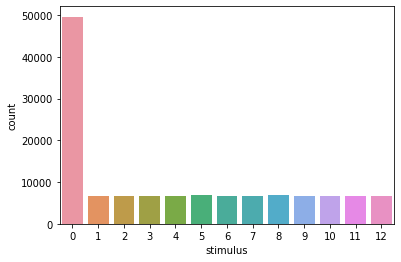

In [51]:
sns.countplot(x = 'stimulus', data=df)

In [52]:
# #distribution of first 16 features


# fig, axs = plt.subplots(nrows=11, ncols=4, figsize=(60, 60))
# axs = axs.flatten()
# index = 0
# for k, v in df.items():
#   print(f"[{index +1}] Updating plot")
#   sns.distplot(v, ax=axs[index])
#   index += 1
#   if index == 43:
#     break 
# plt.tight_layout()


In [53]:
X = df.iloc[:,2:].values
y = df.iloc[:, 1:2].values
print(X.shape, type(X), y.shape, type(y))

# Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=32) # 0.25 x 0.8 = 0.2

print(f"X_train size: {len(X_train)} | X_val size: {len(X_val)} | X_test size: {len(X_test)}")
print(f"y_train size: {len(y_train)} | y_val size: {len(y_val)} | y_test size: {len(y_test)}")
print()
print(f"Training Feature Split: {X_train.shape} | Training Labels { y_train.shape}")
print(f"Validation Feature Split: {X_val.shape} | Validation Labels { y_val.shape}")
print(f"Testing Feature Split: {X_test.shape} | Testing Labels { y_test.shape}")
print()

#Normalization Data 
Minmax = preprocessing.MinMaxScaler()
#Standardized = preprocessing.StandardScaler()
X_train_Minmax= Minmax.fit_transform(X_train)
X_val_Minmax = Minmax.transform(X_val)
X_test_Minmax = Minmax.transform(X_test)

#Convert to numpy then to torch 

X_train = torch.from_numpy(X_train_Minmax).float()
y_train = torch.from_numpy(y_train).float()

X_val = torch.from_numpy(X_val_Minmax).float()
y_val = torch.from_numpy(y_val).float()

X_test = torch.from_numpy(X_test_Minmax).float()
y_test = torch.from_numpy(y_test).float()

print(f"X_train: {type(X_train)} | y_train {type(y_train)}")
print(f"X_val: {type(X_val)} | y_train {type(y_val)}")
print(f"X_test: {type(X_test)} | y_test {type(y_test)}")
print()
print(f"Training: {X_train.shape} , { y_train.shape}")
print(f"Validation: {X_val.shape} , { y_val.shape}")
print(f"Testing:  {X_test.shape} , { y_test.shape}")

(130200, 41) <class 'numpy.ndarray'> (130200, 1) <class 'numpy.ndarray'>
X_train size: 78120 | X_val size: 26040 | X_test size: 26040
y_train size: 78120 | y_val size: 26040 | y_test size: 26040

Training Feature Split: (78120, 41) | Training Labels (78120, 1)
Validation Feature Split: (26040, 41) | Validation Labels (26040, 1)
Testing Feature Split: (26040, 41) | Testing Labels (26040, 1)

X_train: <class 'torch.Tensor'> | y_train <class 'torch.Tensor'>
X_val: <class 'torch.Tensor'> | y_train <class 'torch.Tensor'>
X_test: <class 'torch.Tensor'> | y_test <class 'torch.Tensor'>

Training: torch.Size([78120, 41]) , torch.Size([78120, 1])
Validation: torch.Size([26040, 41]) , torch.Size([26040, 1])
Testing:  torch.Size([26040, 41]) , torch.Size([26040, 1])


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

         0.0       0.38      1.00      0.55      9874
         1.0       0.00      0.00      0.00      1361
         2.0       0.00      0.00      0.00      1282
         3.0       0.00      0.00      0.00      1316
         4.0       0.00      0.00      0.00      1356
         5.0       0.00      0.00      0.00      1395
         6.0       0.00      0.00      0.00      1411
         7.0       0.00      0.00      0.00      1323
         8.0       0.00      0.00      0.00      1344
         9.0       0.00      0.00      0.00      1337
        10.0       0.00      0.00      0.00      1354
        11.0       0.00      0.00      0.00      1383
        12.0       0.00      0.00      0.00      1304

    accuracy                           0.38     26040
   macro avg       0.03      0.08      0.04     26040
weighted avg       0.14      0.38      0.21     26040



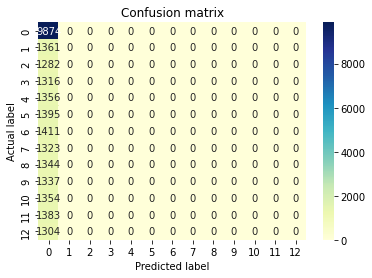

In [54]:
def baseline(X):
  y_pred = []
  for i in range(len(X)):
    y_pred.append(0)
  return y_pred

def confusion_matrix(y_test, y_pred):
    df_cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), index = [0, 1, 2,3,4,5,6,7,8,9,10,11,12],
                  columns = [0, 1, 2,3,4,5,6,7,8,9,10,11,12])
    sns.heatmap(df_cm, annot=True, cmap="YlGnBu" ,fmt='g')
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()
y_pred = baseline(X_test)
print(metrics.classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

In [70]:
class ClassifierDataset(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data

    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]

    def __len__ (self):
        return len(self.X_data)

training = ClassifierDataset(X_train, y_train)
validating = ClassifierDataset(X_val, y_val)
testing = ClassifierDataset(X_test, y_test)
print(training[25])

###############################################################################################
#Hyperparameters
latent_dim = 2
input_dim= 41
hidden_dim= 20
output_dim = 41
num_epochs= 30
batch_size= 100
num_classes = 13
learning_rate= 0.0001 #3e-4 #Karpathy constant
#beta = 1
beta = 0.1

train_loader = DataLoader(training, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(validating, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(testing, batch_size=batch_size, shuffle=False)


(tensor([0.4411, 0.7754, 0.6339, 0.4902, 0.4706, 0.4272, 0.3529, 0.4701, 0.5059,
        0.4844, 0.4192, 0.5216, 0.5333, 0.5234, 0.4837, 0.5110, 0.4980, 0.4860,
        0.5066, 0.3267, 0.3404, 0.3429, 0.6503, 0.6087, 0.3098, 0.1124, 0.5870,
        0.2770, 0.3750, 0.4997, 0.4000, 0.2740, 0.2560, 0.8691, 0.4685, 0.4819,
        0.3714, 0.9252, 0.8292, 0.2273, 0.3448]), tensor([0.]))


In [56]:
class VAE(nn.Module):  
  def __init__(self, input_dim, hidden_dim, latent_dim):
    super(VAE,self).__init__()  
    self.fc1 = nn.Linear(input_dim, hidden_dim)  # no labels
    self.mu = nn.Linear(hidden_dim, latent_dim)   # mu
    self.logvar = nn.Linear(hidden_dim,latent_dim)   # log-var

    self.fc3 = nn.Linear(latent_dim, hidden_dim) 
    self.fc4 = nn.Linear(hidden_dim, input_dim)

  def encode(self, x):     
#    print(f'encoder {type(x)}')         
    z = F.relu(self.fc1(x)) 
    z1 = self.mu(z)               
    z2 = self.logvar(z) 
    return z1, z2                 # (mu, log-var)

  def decode(self, x):
#    print(f'decoder {type(x)}')
    z = F.relu(self.fc3(x))                    
    z = torch.sigmoid(self.fc4(z))      # in [0, 1]
    #print(f"z: {z}")
    return z 

  def forward(self, x):
#    print(f'forward {type(x)}')

#  Reparamaterize
    mu, logvar = self.encode(x)
    stdev = torch.exp(0.5 * logvar)
    esp = torch.randn_like(stdev)
    z_reparmeterized = mu + (esp * stdev)   


    #print(f"z_reparmeterized : {z_reparmeterized}")      
    x_reconstructed = self.decode(z_reparmeterized)
    #print(f"x_reconstructed : {x_reconstructed}")
    return (x_reconstructed, z_reparmeterized, mu, logvar)

if __name__ == "__main__":
  x = torch.rand(100,41)
  vae = VAE(input_dim, hidden_dim, latent_dim)
  x_reconstructed, z_reparmeterized, mu, logvar = vae(x)
  print(x_reconstructed.shape)
  print(mu.shape)
  print(logvar.shape)

torch.Size([100, 41])
torch.Size([100, 2])
torch.Size([100, 2])


In [57]:
model  = VAE(input_dim, hidden_dim, latent_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

print(model)
loss_fn = nn.BCELoss(reduction="sum")

VAE(
  (fc1): Linear(in_features=41, out_features=20, bias=True)
  (mu): Linear(in_features=20, out_features=2, bias=True)
  (logvar): Linear(in_features=20, out_features=2, bias=True)
  (fc3): Linear(in_features=2, out_features=20, bias=True)
  (fc4): Linear(in_features=20, out_features=41, bias=True)
)


In [58]:
train_losses=[]
val_losses=[]
train_acc=[]
val_acc=[]
dic = dict(latent_space = list(), mu_list=list(), logsig2_list=list(), y=list())
for epoch in range(num_epochs):
  
  model.train()
  train_running_loss = 0
#  loop = tqdm(train_loader)
  for i, data in enumerate(train_loader):
    inputs, labels = data
    #print(f'type data: {type(data)}')
    #print(f'type inputs: {type(inputs)}')
    #print(f'type labels: {type(labels)}')

    x_reconstructed, z_reparmeterized,mu, logvar = model(inputs)
    #print(x_reconstructed, type(x_reconstructed))
    #print(mu, type(mu))
    #print(logvar, type(logvar))

    reconstruction_loss = loss_fn(x_reconstructed, inputs)
    kld_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    loss = reconstruction_loss + kld_loss*beta
    #print(reconstruction_loss, kld_loss, loss)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_running_loss += loss.item()
    train_loss= train_running_loss/len(train_loader)
  
  z_list, means, logvars , labels = list(), list(), list(), list()
  with torch.inference_mode():
    val_running_loss = 0

    model.eval()
    for X, Y in val_loader:
      #print(labels)
      #inputs = torch.autograd.Variable(inputs)
      y_pred, z_reparmeterized, mu, logvar = model(X)
      v_reconstruction_loss = loss_fn(y_pred, X)
      v_kld_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
      vloss = v_reconstruction_loss + v_kld_loss*beta
      #print(v_reconstruction_loss, v_kld_loss, vloss)
      val_running_loss += vloss.item()
      val_loss = val_running_loss/len(val_loader)

      # log ...
      z_list.append(z_reparmeterized.detach())
      means.append(mu.detach())
      logvars.append(logvar.detach())
      labels.append(Y.detach())

  dic['latent_space'].append(torch.cat(z_list))
  dic['mu_list'].append(torch.cat(means))
  dic['logsig2_list'].append(torch.cat(logvars))
  dic['y'].append(torch.cat(labels))

  print(f"Epoch: {epoch+1} / {num_epochs} | reconst_loss: {reconstruction_loss:.3f} | kldiv loss: {kld_loss} | total loss: {train_loss:.3f} ||| Val Loss: {val_loss:.3f}")
  print("------------------------------------------------------------------------------------------------------------------")
  #print(f"Epoch: {epoch+1} / {num_epochs} | reconst_loss: {v_reconstruction_loss:.3f} | kldiv loss: {v_kld_loss:.3f} | Val Loss: {val_loss:.3f}")
  train_losses.append(train_loss)
  val_losses.append(val_loss)
  



Epoch: 1 / 10 | reconst_loss: 541.877 | kldiv loss: 51.76007080078125 | total loss: 2826.332 ||| Val Loss: 2730.103
------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | reconst_loss: 537.236 | kldiv loss: 36.007659912109375 | total loss: 2713.371 ||| Val Loss: 2699.917
------------------------------------------------------------------------------------------------------------------
Epoch: 3 / 10 | reconst_loss: 538.663 | kldiv loss: 25.334558486938477 | total loss: 2698.771 ||| Val Loss: 2692.230
------------------------------------------------------------------------------------------------------------------
Epoch: 4 / 10 | reconst_loss: 535.065 | kldiv loss: 20.571060180664062 | total loss: 2693.355 ||| Val Loss: 2687.979
------------------------------------------------------------------------------------------------------------------
Epoch: 5 / 10 | reconst_loss: 534.888 | kldiv loss: 12.96025562286377 | t

In [69]:
torch.save(model.state_dict(), 'VAE_Model.pt') # Save

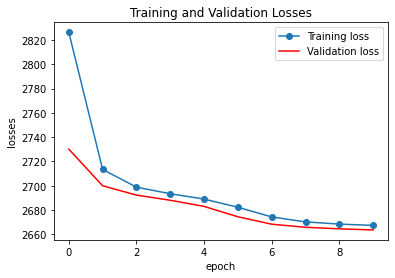

In [68]:
plt.plot(train_losses,'-o', label="Training loss")
plt.plot(val_losses,'-r',  label="Validation loss")
plt.xlabel('epoch')
plt.ylabel('losses')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

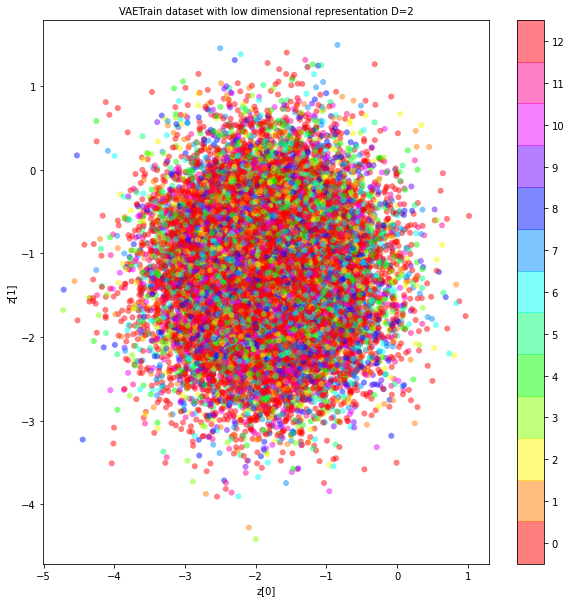

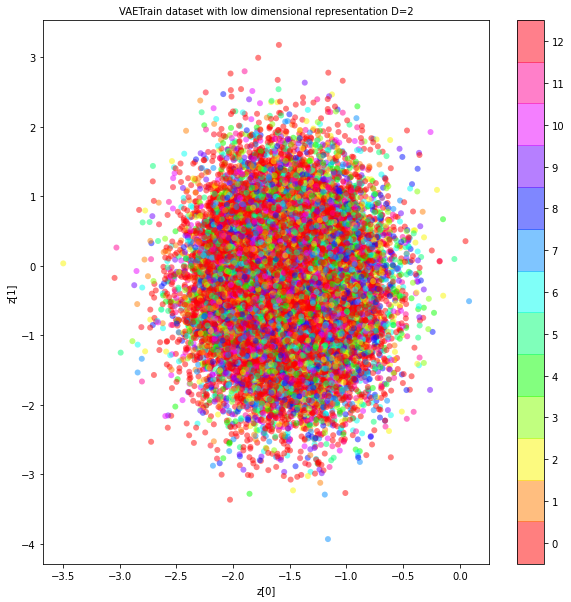

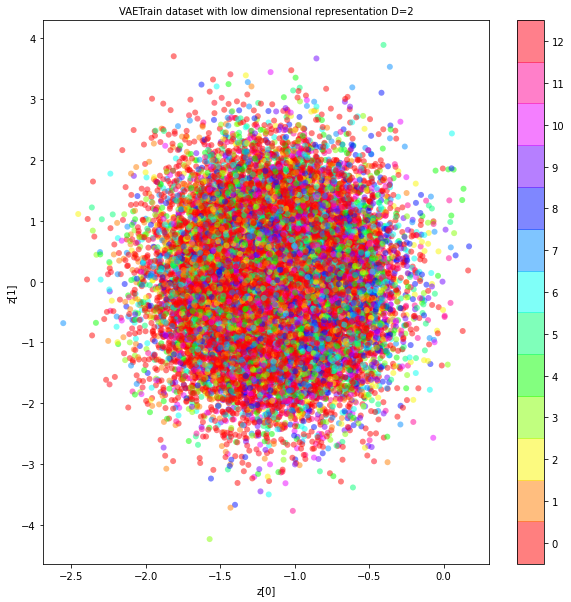

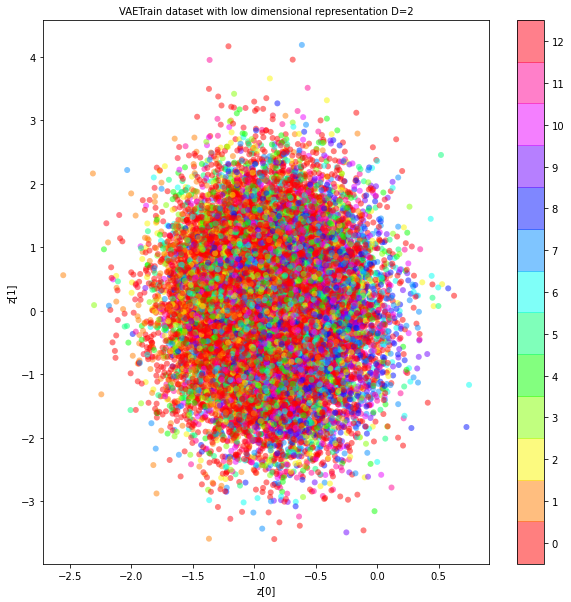

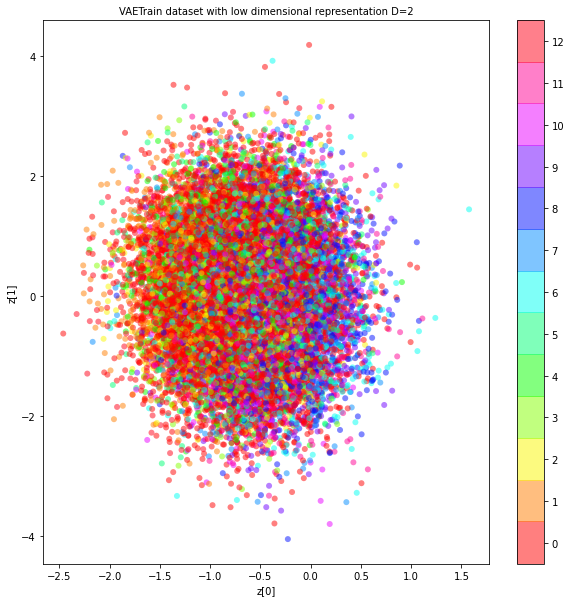

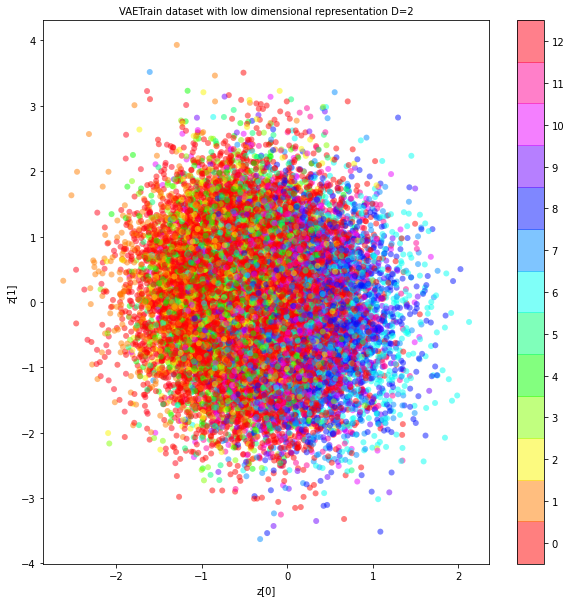

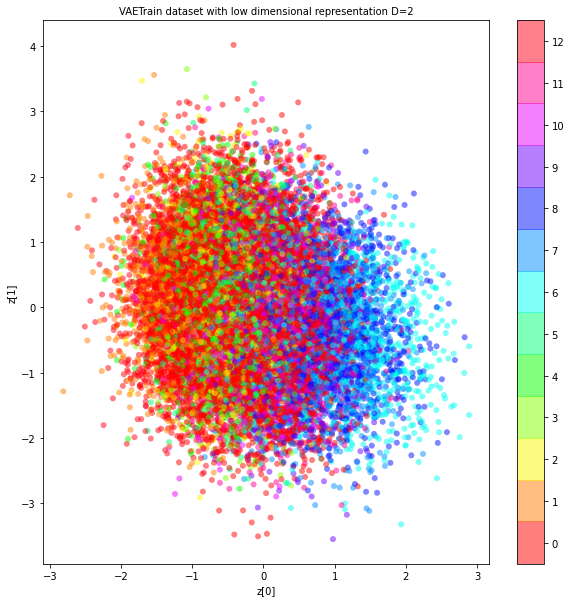

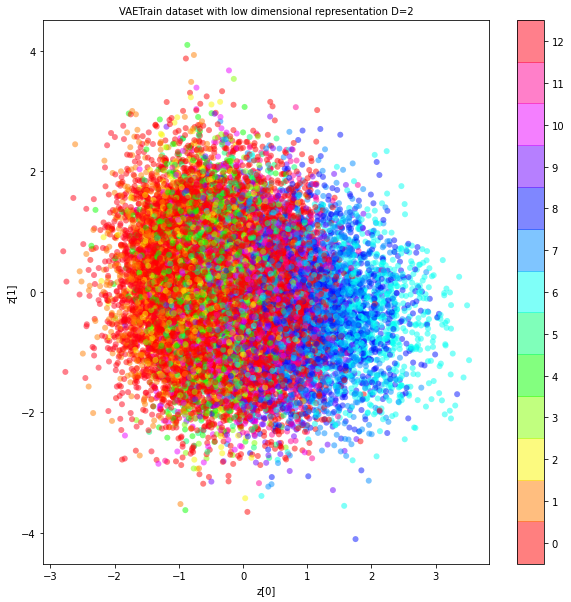

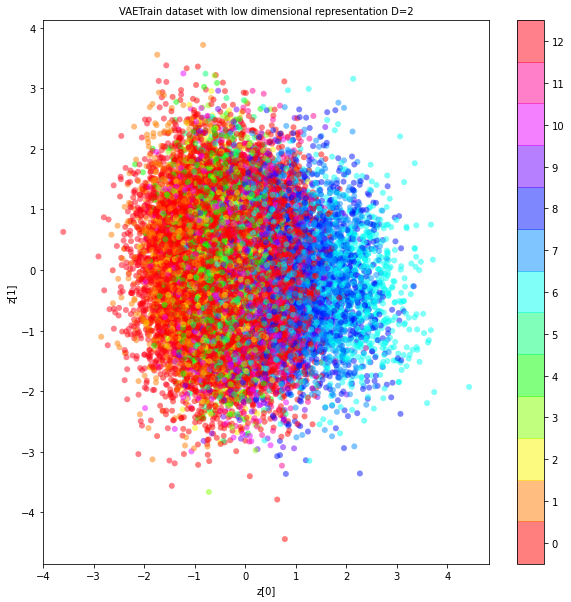

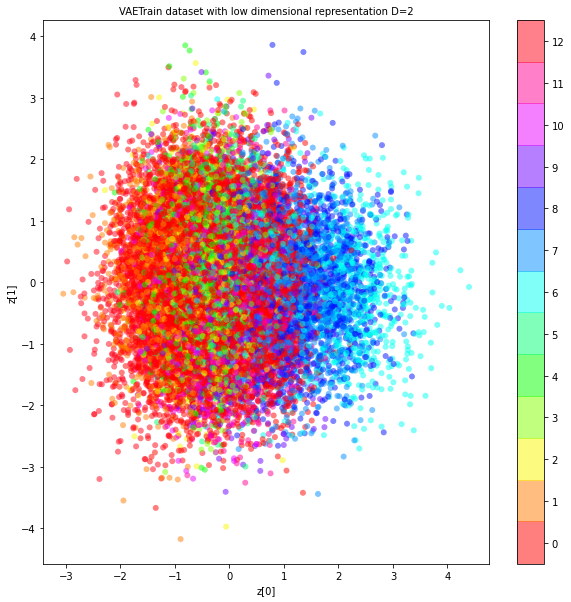

In [61]:
for i in range (num_epochs):
  fig = plt.figure(figsize=(10,10))
  z_arr = dic['latent_space'][i].cpu().numpy()
  y_arr = dic['y'][i].cpu().numpy()
  plt.scatter(z_arr[:,0], z_arr[:,1], c = y_arr, edgecolor='none', alpha=0.5,
              cmap=plt.cm.get_cmap('hsv', 13))
  cb = plt.colorbar(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12],values=[0,1,2,3,4,5,6,7,8,9,10,11,12])
  cb.ax.tick_params(labelsize=10)
  plt.xticks(fontsize= 10)
  plt.yticks(fontsize= 10)
  plt.xlabel('z[0]', fontsize= 10)
  plt.ylabel('z[1]', fontsize= 10)
  plt.title('VAETrain dataset with low dimensional representation D=2', fontsize= 10)
  plt.show()
fig.savefig("VAEtrain" + ".png")

In [62]:
# for i in range (num_epochs):
#   z_arr = dic['latent_space'][i].cpu().numpy()
#   y_arr = dic['y'][i].cpu().numpy()
#   plt.figure(figsize = (10,5))
#   plt.subplot(1,2,1)
#   plt.scatter(z_arr[:,0], z_arr[:,1], c = y_arr)
#   plt.colorbar()
#   plt.tight_layout()

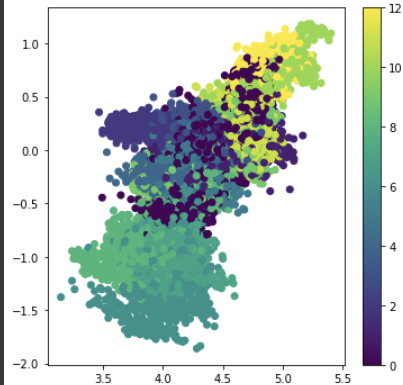

---
Test
---

In [63]:
# # working VAE with latent space repersentation

# def train_model(beta, epochs, model):
#   dic = dict(latent_space = list(), mu_list=list(), logsig2_list=list(), y=list())
#   for epoch in range(0, epochs + 1):
#     if epoch > 0: 
#       model.train()
#       train_loss =0
#       for X, _ in train_loader:
#         x_reconstructed, z_reparmeterized, mu, logvar = model(X)

#         reconstruction_loss = loss_fn(x_reconstructed, X)
#         kld_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

#         loss = reconstruction_loss + kld_loss*3
#         train_loss += loss.item()
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#       print(f'----> Epoch: {epoch} Average loss: {train_loss / len(train_loader):.4f}')
    
#     # Validation 
#     z_list, means, logvars , labels = list(), list(), list(), list()
#     with torch.no_grad():
#         model.eval()
#         validate_loss = 0
#         for X, Y in test_loader:
#           X = X.to(device)
#           # forward ...
#           x_reconstructed, z_reparmeterized, mu, logvar = model(X)

#           reconstruction_loss = loss_fn(x_reconstructed, X)
#           kld_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
#           validation_loss = reconstruction_loss + kld_loss
#           validate_loss += validation_loss.item()

#           # log ...
#           z_list.append(z_reparmeterized.detach())
#           means.append(mu.detach())
#           logvars.append(logvar.detach())
#           labels.append(Y.detach())
          

#     dic['latent_space'].append(torch.cat(z_list))
#     dic['mu_list'].append(torch.cat(means))
#     dic['logsig2_list'].append(torch.cat(logvars))
#     dic['y'].append(torch.cat(labels))
    
#     print(f'----> Val loss:  {validate_loss / len(val_loader):.4f}')
#   return dic

# dic = train_model(beta, num_epochs, model)

# z_arr = dic['latent_space'][0].cpu().numpy()
# y_arr = dic['y'][0].cpu().numpy()
# plt.figure(figsize = (10,5))
# plt.subplot(1,2,1)
# plt.scatter(z_arr[:,0], z_arr[:,1], c = y_arr)
# #plt.scatter(z_arr[:,1], z_arr[:,2], c = y_arr)
# plt.colorbar()
# plt.tight_layout()

------

In [64]:
# class Loss_Term(nn.Module):
#   def __init__(self):
#     super(Loss_Term, self).__init__()
#     self.mse_loss = nn.MSELoss(reduction="sum")
#     #self.ce_loss = nn.CrossEntropyLoss(reduction="sum")
# # x_reconstructed is the recon_batch created in the forward in the model
# # x is the original x batch, mu is mu and logvar is logvar
#   def forward(self, x_reconstructed,x, mu, logvar):
#     #loss_CE = self.ce_loss(x_reconstructed, x)
#     loss_MSE = self.mse_loss(x_reconstructed, x)
#     loss_KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
#     return loss_MSE + loss_KLD 
#     #return loss_CE + loss_KLD

# loss_func = Loss_Term()

# val_losses = []
# train_losses = []

# def train(epoch):
#     model.train()
#     train_loss = 0
#     for (inputs, labels) in train_loader:
#         optimizer.zero_grad()
#         recon_batch, mu, logvar = model(inputs)
#         loss = loss_func(recon_batch, mu, logvar)
#         loss.backward()
#         train_loss += loss.item()
#         optimizer.step()
# #        if batch_idx % log_interval == 0:
# #            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
# #                epoch, batch_idx * len(data), len(trainloader.dataset),
# #                       100. * batch_idx / len(trainloader),
# #                       loss.item() / len(data)))
#     if epoch % 200 == 0:        
#         print('====> Epoch: {} Average loss: {:.4f}'.format(
#             epoch, train_loss / len(train_loader.dataset)))
#         train_losses.append(train_loss / len(train_loader.dataset))
# for epoch in range(1, num_epochs + 1):
#     train(epoch)

In [65]:
# class Encoder(nn.Module):
#     def __init__(self, latent_dims):
#         super(Encoder, self).__init__()
#         self.linear1 = nn.Linear(41, 20)
#         self.linear2 = nn.Linear(20, latent_dims)

#     def forward(self, x):
#         x = torch.flatten(x, start_dim=1)
#         x = F.relu(self.linear1(x))
#         return self.linear2(x)


# class Decoder(nn.Module):
#     def __init__(self, latent_dims):
#         super(Decoder, self).__init__()
#         self.linear1 = nn.Linear(latent_dims, 20)
#         self.linear2 = nn.Linear(20, 41)

#     def forward(self, z):
#         z = F.relu(self.linear1(z))
#         z = torch.sigmoid(self.linear2(z))
#         return z

# class Autoencoder(nn.Module):
#     def __init__(self, latent_dims):
#         super(Autoencoder, self).__init__()
#         self.encoder = Encoder(latent_dims)
#         self.decoder = Decoder(latent_dims)

#     def forward(self, x):
#         z = self.encoder(x)
#         return self.decoder(z)

# losses = []
# train_losses=[]
# def train(autoencoder, data, epochs=num_epochs):
#     optimizer = optim.Adam(params=autoencoder.parameters(), lr=learning_rate)
#     for epoch in range(epochs):
#         running_loss = 0
#         for x, y in data:
#             x = x.to(device) # GPU
#             optimizer.zero_grad()
#             x_hat = autoencoder(x)
#             loss = ((x - x_hat)**2).sum()
#             loss.backward()
#             optimizer.step()

#             running_loss += loss.item()
#             train_loss=running_loss/len(train_loader)
#             i= 0
#         print(f"Epoch: {epoch+1} / {epochs} | total loss: {(loss)}")
#         train_losses.append(train_loss)
        
#         plt.plot(train_losses,'-o')
#         plt.xlabel('epoch')
#         plt.ylabel('losses')
#         plt.title('Train Losses')
#         plt.show()  

#         # if i % 200 == 0:
#         #       print(epoch)


#     return autoencoder

# latent_dims = 2
# autoencoder = Autoencoder(latent_dims).to(device) # GPU

# data = train_loader

# autoencoder = train(autoencoder, data)

In [66]:
# def plot_latent(autoencoder, data, num_batches=100):
#     for i, (x, y) in enumerate(data):
#         z = autoencoder.encoder(x.to(device))
#         z = z.to('cpu').detach().numpy()
#         plt.scatter(z[:, 0], z[:, 1], c=y, cmap='tab10')
#         if i > num_batches:
#             plt.colorbar()
#             break
# plot_latent(autoencoder, data)

---
Example VAE
---

In [67]:
# import torch
# import torchvision
# from torch import nn
# from torch.utils.data import DataLoader
# from torchvision import transforms
# from torchvision.datasets import MNIST
# from matplotlib import pyplot as plt
# # Displaying routine

# def display_images(in_, out, n=1, label=None, count=False):
#     for N in range(n):
#         if in_ is not None:
#             in_pic = in_.data.cpu().view(-1, 28, 28)
#             plt.figure(figsize=(18, 4))
#             plt.suptitle(label + ' – real test data / reconstructions', color='w', fontsize=16)
#             for i in range(4):
#                 plt.subplot(1,4,i+1)
#                 plt.imshow(in_pic[i+4*N])
#                 plt.axis('off')
#         out_pic = out.data.cpu().view(-1, 28, 28)
#         plt.figure(figsize=(18, 6))
#         for i in range(4):
#             plt.subplot(1,4,i+1)
#             plt.imshow(out_pic[i+4*N])
#             plt.axis('off')
#             if count: plt.title(str(4 * N + i), color='w')
# # Set random seeds

# torch.manual_seed(1)
# torch.cuda.manual_seed(1)
# # Define data loading step

# batch_size = 256

# kwargs = {'num_workers': 1, 'pin_memory': True}
# train_loader = torch.utils.data.DataLoader(
#     MNIST('./data', train=True, download=True,
#                    transform=transforms.ToTensor()),
#     batch_size=batch_size, shuffle=True, **kwargs)
# test_loader = torch.utils.data.DataLoader(
#     MNIST('./data', train=False, transform=transforms.ToTensor()),
#     batch_size=batch_size, shuffle=True, **kwargs)
# # Defining the device

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# # Defining the model

# d = 20

# class VAE(nn.Module):
#     def __init__(self):
#         super().__init__()

#         self.encoder = nn.Sequential(
#             nn.Linear(784, d ** 2),
#             nn.ReLU(),
#             nn.Linear(d ** 2, d * 2)
#         )

#         self.decoder = nn.Sequential(
#             nn.Linear(d, d ** 2),
#             nn.ReLU(),
#             nn.Linear(d ** 2, 784),
#             nn.Sigmoid(),
#         )

#     def reparameterise(self, mu, logvar):
#         if self.training:
#             std = logvar.mul(0.5).exp_()
#             eps = std.new_empty(std.size()).normal_()
#             return eps.mul_(std).add_(mu)
#         else:
#             return mu

#     def forward(self, x):
#         mu_logvar = self.encoder(x.view(-1, 784)).view(-1, 2, d)
#         mu = mu_logvar[:, 0, :]
#         logvar = mu_logvar[:, 1, :]
#         z = self.reparameterise(mu, logvar)
#         return self.decoder(z), mu, logvar

# model = VAE().to(device)
# # Setting the optimiser

# learning_rate = 1e-3

# optimizer = torch.optim.Adam(
#     model.parameters(),
#     lr=learning_rate,
# )
# # Reconstruction + β * KL divergence losses summed over all elements and batch

# def loss_function(x_hat, x, mu, logvar, β=1):
#     BCE = nn.functional.binary_cross_entropy(
#         x_hat, x.view(-1, 784), reduction='sum'
#     )
#     KLD = 0.5 * torch.sum(logvar.exp() - logvar - 1 + mu.pow(2))

#     return BCE + β * KLD
# # Training and testing the VAE

# epochs = 10
# codes = dict(μ=list(), logσ2=list(), y=list())
# for epoch in range(0, epochs + 1):
#     # Training
#     if epoch > 0:  # test untrained net first
#         model.train()
#         train_loss = 0
#         for x, _ in train_loader:
#             x = x.to(device)
#             # ===================forward=====================
#             x_hat, mu, logvar = model(x)
#             loss = loss_function(x_hat, x, mu, logvar)
#             train_loss += loss.item()
#             # ===================backward====================
#             optimizer.zero_grad()
#             loss.backward()
#             optimizer.step()
#         # ===================log========================
#         print(f'====> Epoch: {epoch} Average loss: {train_loss / len(train_loader.dataset):.4f}')
    
#     # Testing
    
#     means, logvars, labels = list(), list(), list()
#     with torch.no_grad():
#         model.eval()
#         test_loss = 0
#         for x, y in test_loader:
#             x = x.to(device)
#             # ===================forward=====================
#             x_hat, mu, logvar = model(x)
#             test_loss += loss_function(x_hat, x, mu, logvar).item()
#             # =====================log=======================
#             means.append(mu.detach())
#             logvars.append(logvar.detach())
#             labels.append(y.detach())
#     # ===================log========================
#     codes['μ'].append(torch.cat(means))
#     codes['logσ2'].append(torch.cat(logvars))
#     codes['y'].append(torch.cat(labels))
#     test_loss /= len(test_loader.dataset)
#     print(f'====> Test set loss: {test_loss:.4f}')
#     display_images(x, x_hat, 1, f'Epoch {epoch}')
# # Generating a few samples

# N = 16
# z = torch.randn((N, d)).to(device)
# sample = model.decoder(z)
# display_images(None, sample, N // 4, count=True)
# # Display last test batch

# display_images(None, x, 4, count=True)
# # Choose starting and ending point for the interpolation -> shows original and reconstructed

# A, B = 1, 14
# sample = model.decoder(torch.stack((mu[A].data, mu[B].data), 0))
# display_images(None, torch.stack(((
#     x[A].data.view(-1),
#     x[B].data.view(-1),
#     sample.data[0],
#     sample.data[1]
# )), 0))
# # Perform an interpolation between input A and B, in N steps

# N = 16
# code = torch.Tensor(N, 20).to(device)
# sample = torch.Tensor(N, 28, 28).to(device)
# for i in range(N):
#     code[i] = i / (N - 1) * mu[B].data + (1 - i / (N - 1) ) * mu[A].data
#     # sample[i] = i / (N - 1) * x[B].data + (1 - i / (N - 1) ) * x[A].data
# sample = model.decoder(code)
# display_images(None, sample, N // 4, count=True)
# import numpy as np
# from sklearn.manifold import TSNE
# from res.plot_lib import set_default
# set_default(figsize=(15, 4))
# X, Y, E = list(), list(), list()  # input, classes, embeddings
# N = 1000  # samples per epoch
# epochs = (0, 5, 10)
# for epoch in epochs:
#     X.append(codes['μ'][epoch][:N])
#     E.append(TSNE(n_components=2).fit_transform(X[-1].detach().cpu()))
#     Y.append(codes['y'][epoch][:N])
# f, a = plt.subplots(ncols=3)
# for i, e in enumerate(epochs):
#     s = a[i].scatter(E[i][:,0], E[i][:,1], c=Y[i], cmap='tab10')
#     a[i].grid(False)
#     a[i].set_title(f'Epoch {e}')
#     a[i].axis('equal')
# f.colorbar(s, ax=a[:], ticks=np.arange(10), boundaries=np.arange(11) - .5)